- 利用 pandas 計算指標 (MA、HH、LL)
- 利用 matlibplot 畫出進出場訊號

In [1]:
# 引入模組

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

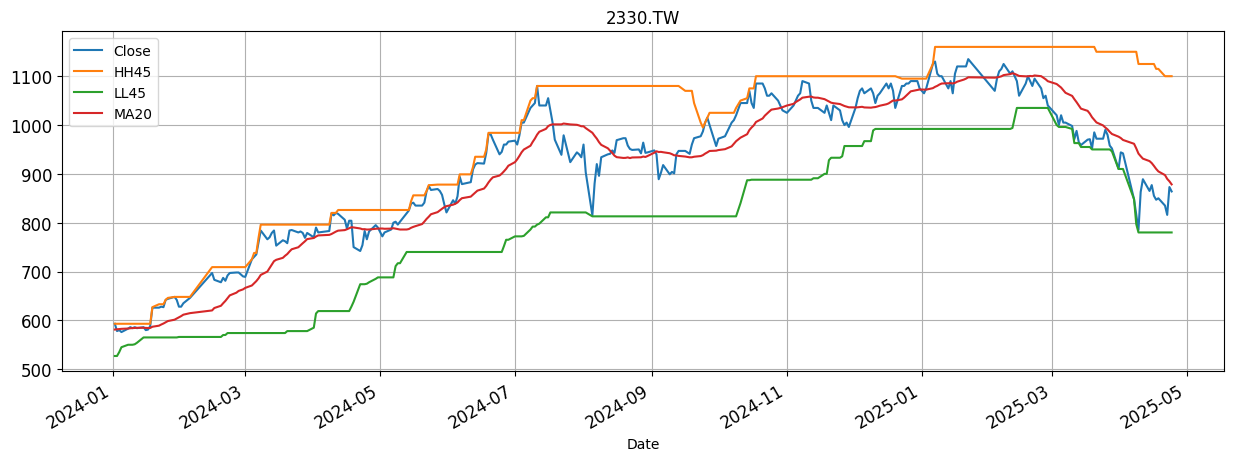

In [2]:
# 讀取股票資料
# 計算指標

df = pd.read_csv("C:\\__STOCK\\DATA\\TWSE\\2330.csv", usecols=["Date", "High", "Low", "Close"])
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")
df = df.set_index("Date")

df["MA20"] = df["Close"].rolling(20).mean()
df["HH45"] = df["High"].rolling(45).max()
df["LL45"] = df["Low"].rolling(45).min()

df = df["2024":"2025"]
df = df.dropna()

df[["Close", "HH45", "LL45", "MA20"]].plot(title="2330.TW", figsize=(15, 5), fontsize=12, grid=True)
plt.show()

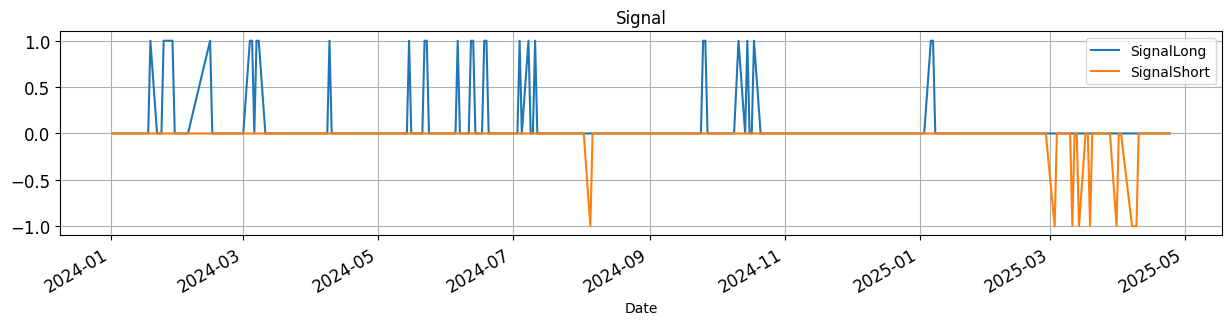

In [3]:
# Long：Close > HH45
# Short：Close < LL45

ConditionLong = df["Close"] > df["HH45"].shift(1)
ConditionShort = df["Close"] < df["LL45"].shift(1)

df["SignalLong"] = np.where(ConditionLong, 1, 0)
df["SignalShort"] = np.where(ConditionShort, -1, 0)

df[["SignalLong", "SignalShort"]].plot(title="Signal", figsize=(15, 3), fontsize=12, grid=True)
plt.show()

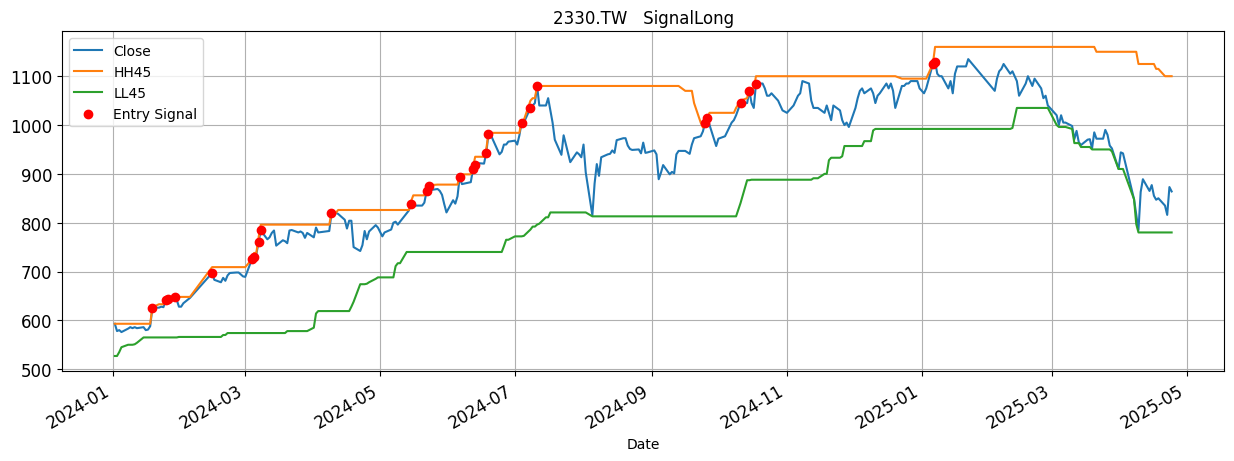

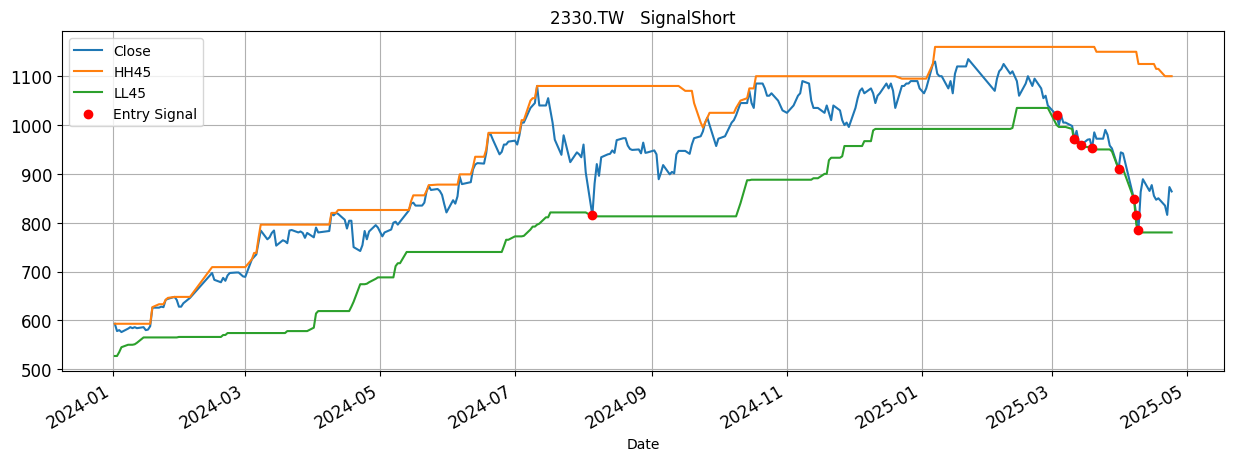

In [4]:
# 結合 走勢圖與進場點

df_Long = df[df["SignalLong"] == 1]

df[["Close", "HH45", "LL45"]].plot(title="2330.TW   SignalLong", figsize=(15, 5), fontsize=12, grid=True)
plt.scatter(df_Long.index, df_Long["Close"], color="red", label="Entry Signal", zorder=5)   # scatter | 畫圓點

plt.legend()    # 顯示所有 label
plt.show()

# ------------------------------

df_Short = df[df["SignalShort"] == -1]

df[["Close", "HH45", "LL45"]].plot(title="2330.TW   SignalShort", figsize=(15, 5), fontsize=12, grid=True)
plt.scatter(df_Short.index, df_Short["Close"], color="red", label="Entry Signal", zorder=5)   # scatter | 畫圓點

plt.legend()    # 顯示所有 label
plt.show()